# Introduce

This dataset contains all the stats of all club goals of Cristiano Ronaldo dos Santos Aveiro. link [datasets](https://www.kaggle.com/datasets/azminetoushikwasi/cr7-cristiano-ronaldo-all-club-goals-stats) 

# Import Package

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Read Datasets

In [2]:
df = pd.read_csv("datasets/data.csv")
df.head()

,Season,Competition,Matchday,Date,Venue,Club,Opponent,Result,Playing_Position,Minute,At_score,Type,Goal_assist
0,02-Mar,Liga Portugal,6,10-07-02,H,Sporting CP,Moreirense FC,3:00,LW,34,2:00,Solo run,NaN
1,02-Mar,Liga Portugal,6,10-07-02,H,Sporting CP,Moreirense FC,3:00,LW,90+5,3:00,Header,Rui Jorge
2,02-Mar,Liga Portugal,8,10/26/02,A,Sporting CP,Boavista FC,1:02,NaN,88,1:02,Right-footed shot,Carlos Martins
3,02-Mar,Taca de Portugal Placard,Fourth Round,11/24/02,H,Sporting CP,CD Estarreja,4:01,NaN,67,3:00,Left-footed shot,Cesar Prates
4,02-Mar,Taca de Portugal Placard,Fifth Round,12/18/02,H,Sporting CP,FC Oliveira do Hospital,8:01,NaN,13,3:00,NaN,NaN


# Cleaning Datasets

In [3]:
# check dimension data
df.shape

(699, 13)

In [4]:
# check null data
df.isnull().sum()

Season                0
Competition           0
Matchday              0
Date                  0
Venue                 0
Club                  0
Opponent              0
Result                0
Playing_Position     57
Minute                0
At_score              0
Type                 15
Goal_assist         241
dtype: int64

In [5]:
# Check Duplicate Data
df.duplicated().sum()

0

In [6]:
# Cleaning Column Season
df.Season.unique()

array(['02-Mar', '03-Apr', '04-May', '05-Jun', '06-Jul', '07-Aug',
       '08-Sep', '09-Oct', '10-Nov', '11-Dec', 'Dec-13', '13/14', '14/15',
       '15/16', '16/17', '17/18', '18/19', '19/20', '20/21', '21/22',
       '22/23'], dtype=object)

In [7]:
season_year = ["02-Mar","03-Apr","04-May","05-Jun","06-Jul","07-Aug","08-Sep","09-Oct","10-Nov","11-Dec","Dec-13"]
season_year_to = ["02/03","03/04","04/05","05/06","06/07","07/08","08/09","09/10","10/11","11/12","12/13"]

df['Season'] = df.replace(season_year, season_year_to)

In [8]:
df.Season.unique()

array(['02/03', '03/04', '04/05', '05/06', '06/07', '07/08', '08/09',
       '09/10', '10/11', '11/12', '12/13', '13/14', '14/15', '15/16',
       '16/17', '17/18', '18/19', '19/20', '20/21', '21/22', '22/23'],
      dtype=object)

In [9]:
# Cleaning Column Playing Position
df.Playing_Position.unique()

array(['LW', nan, 'RW', 'CF', 'LW ', 'CF '], dtype=object)

In [10]:
df["Playing_Position"] = df["Playing_Position"].replace(["CF ", "LW "], ["CF","LW"])

In [11]:
df.Playing_Position.unique()

array(['LW', nan, 'RW', 'CF'], dtype=object)

# Exploratori Data Analysis (EDA) and Data Visualization

### Goals Per Clubs

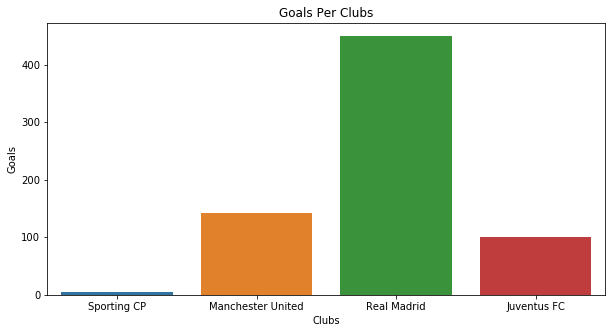

In [12]:
plt.figure(figsize=(10,5))
sns.countplot(x=df["Club"])

plt.title('Goals Per Club')
plt.ylabel('Goals')
plt.xlabel('Clubs')
plt.show()

In [13]:
pd.DataFrame(df['Club'].value_counts())

,Club
Real Madrid,450
Manchester United,143
Juventus FC,101
Sporting CP,5


### Goal Per Season

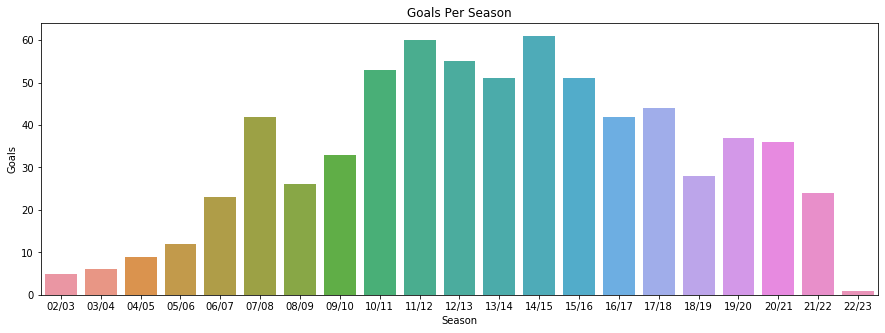

In [14]:
plt.figure(figsize=(15,5))
sns.countplot(x=df["Season"])

plt.title('Goals Per Season')
plt.ylabel('Goals')
plt.xlabel('Season')
plt.show()

In [15]:
pd.DataFrame(df['Season'].value_counts())

,Season
14/15,61
11/12,60
12/13,55
10/11,53
15/16,51
13/14,51
17/18,44
07/08,42
16/17,42
19/20,37


### Goals Per Competition

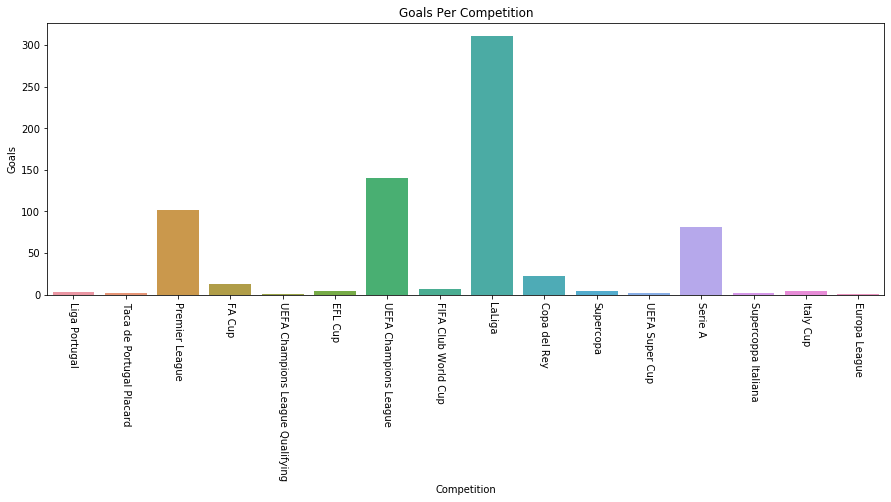

In [16]:
plt.figure(figsize=(15,5))
sns.countplot(x=df["Competition"])

plt.title('Goals Per Competition')
plt.ylabel('Goals')
plt.xlabel('Competition')
plt.xticks(rotation='270')
plt.show()

In [17]:
pd.DataFrame(df['Competition'].value_counts())

,Competition
LaLiga,311
UEFA Champions League,140
Premier League,102
Serie A,81
Copa del Rey,22
FA Cup,13
FIFA Club World Cup,7
EFL Cup,4
Supercopa,4
Italy Cup,4


### The most conceded club

In [18]:
pd.DataFrame(df['Opponent'].value_counts()).head(20)

,Opponent
Sevilla FC,27
Atletico de Madrid,25
Getafe CF,23
Celta de Vigo,20
FC Barcelona,20
Athletic Bilbao,17
Malaga CF,17
Villarreal CF,15
Valencia CF,15
Real Sociedad,15


### Goals Per Playing Position

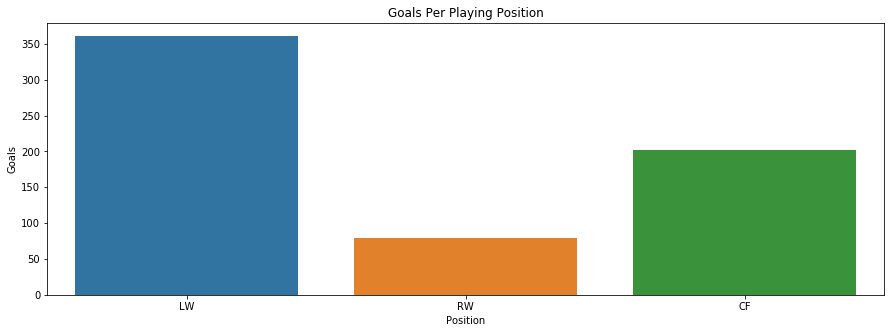

In [19]:
plt.figure(figsize=(15,5))
sns.countplot(x=df["Playing_Position"])

plt.title('Goals Per Playing Position')
plt.ylabel('Goals')
plt.xlabel('Position')
plt.show()

In [20]:
pd.DataFrame(df.Playing_Position.value_counts())

,Playing_Position
LW,361
CF,202
RW,79


## Goals Type 

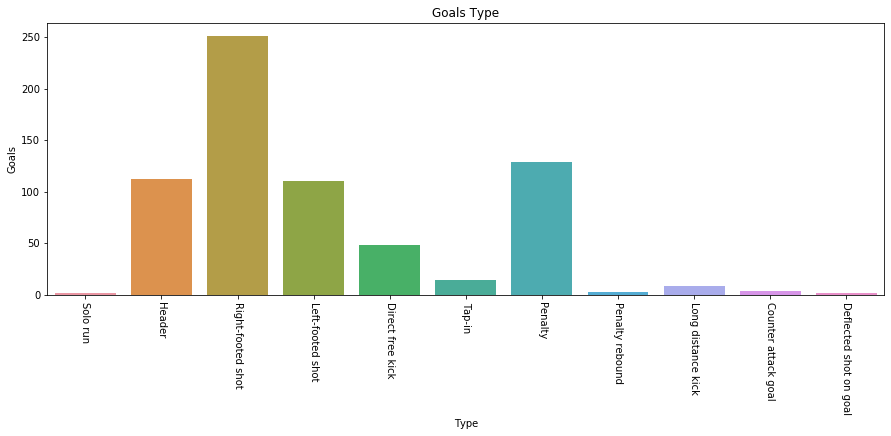

In [21]:
plt.figure(figsize=(15,5))
sns.countplot(x=df["Type"])

plt.title('Goals Type')
plt.ylabel('Goals')
plt.xlabel('Type')
plt.xticks(rotation='270')
plt.show()

In [22]:
pd.DataFrame(df.Type.value_counts())

,Type
Right-footed shot,251
Penalty,129
Header,112
Left-footed shot,110
Direct free kick,48
Tap-in,14
Long distance kick,9
Counter attack goal,4
Penalty rebound,3
Deflected shot on goal,2


## Most Assist For Ronaldo

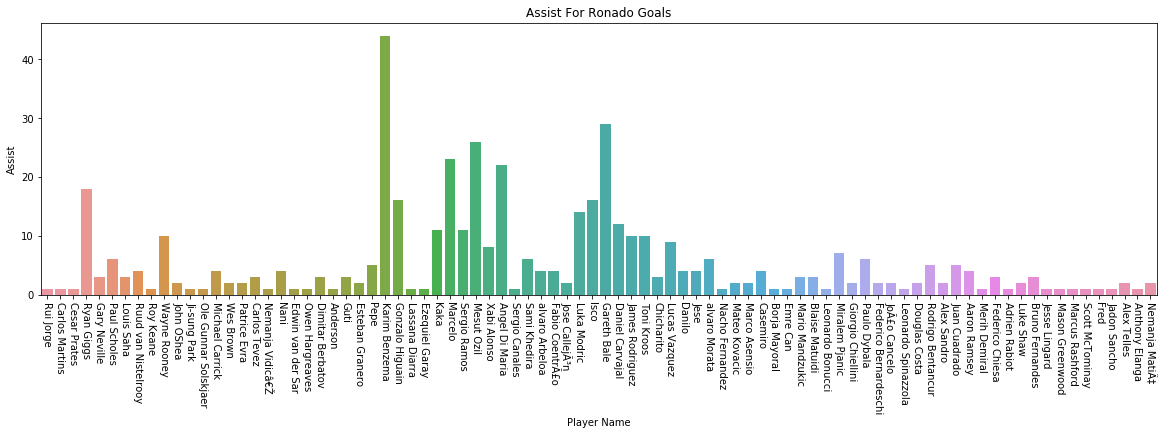

In [23]:
plt.figure(figsize=(20,5))
sns.countplot(x=df["Goal_assist"])

plt.title('Assist For Ronado Goals')
plt.ylabel('Assist')
plt.xlabel('Player Name')
plt.xticks(rotation='270')
plt.show()

In [24]:
pd.DataFrame(df.Goal_assist.value_counts()).head(20)

,Goal_assist
Karim Benzema,44
Gareth Bale,29
Mesut Ozil,26
Marcelo,23
Angel Di Maria,22
Ryan Giggs,18
Gonzalo Higuain,16
Isco,16
Luka Modric,14
Daniel Carvajal,12


## Goals Per Venue

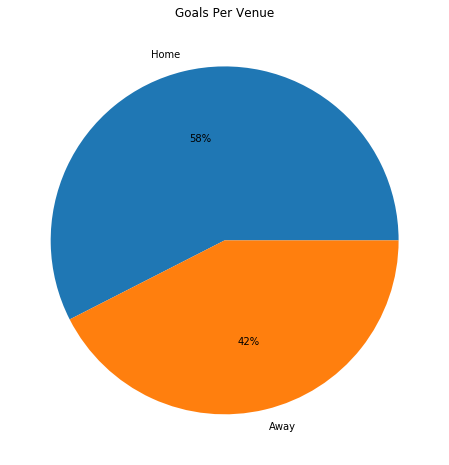

In [25]:
plt.figure(figsize=(15,8))
plt.pie(x=df.Venue.value_counts(), labels=["Home", "Away"], autopct='%1.0f%%')
plt.title(label="Goals Per Venue")
plt.show()

In [40]:
pd.DataFrame(df.Venue.value_counts())

,Venue
H,402
A,297


# Conclusion

- Most goals in one club = <b>Real Madrid (450 Goals)</b>
- Most goals in one Season = <b>Season 14/15 (61 Goals)</b>
- Most goals in one competition = <b>LaLiga (311 Goals)</b>
- Most goals in one position = <b>Left-Wing (361 Goals)</b>
- Most goals type = <b>Right-footed shot (251 Goals)</b>
- Most assist for ronaldo goals = <b>Karim Benzema (44 Assist)</b>
- Most goals per venue = <b>Home (402 Match)</b>